In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import requests

In [2]:
def welcome (x):
    print("Welcome " + x)

welcome("reader,")
welcome("to the code behind my Data Analytics Project.")

Welcome reader,
Welcome to the code behind my Data Analytics Project.


In [3]:
pd.read_csv(r"C:\\Users\murph\OneDrive\Documents\NBAStats2324.csv")

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,0.501,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,0.521,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
2,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,0.411,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
3,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,0.435,...,0.621,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,0.439,...,0.800,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,35,TOT,33,6,13.3,2.0,3.3,0.602,...,0.400,1.4,1.7,3.1,1.7,0.7,0.2,0.5,1.5,4.2
568,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,0.430,...,0.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7
569,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,0.538,...,0.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6
570,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,0.419,...,0.605,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8


In [4]:
nba = pd.read_csv('NBAStats2324.csv')
nba.drop_duplicates()
nba.fillna(0)
print(nba.head())

                     Player   Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  \
0          Precious Achiuwa  PF-C   24  TOT  74  18  21.9  3.2   6.3  0.501   
1               Bam Adebayo     C   26  MIA  71  71  34.0  7.5  14.3  0.521   
2              Ochai Agbaji    SG   23  TOT  78  28  21.0  2.3   5.6  0.411   
3              Santi Aldama    PF   23  MEM  61  35  26.5  4.0   9.3  0.435   
4  Nickeil Alexander-Walker    SG   25  MIN  82  20  23.4  2.9   6.6  0.439   

   ...    FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  ...  0.616  2.6  4.0   6.6  1.3  0.6  0.9  1.1  1.9   7.6  
1  ...  0.755  2.2  8.1  10.4  3.9  1.1  0.9  2.3  2.2  19.3  
2  ...  0.661  0.9  1.8   2.8  1.1  0.6  0.6  0.8  1.5   5.8  
3  ...  0.621  1.2  4.6   5.8  2.3  0.7  0.9  1.1  1.5  10.7  
4  ...  0.800  0.4  1.6   2.0  2.5  0.8  0.5  0.9  1.7   8.0  

[5 rows x 29 columns]


In [5]:
nbateams = nba.sort_values(['Tm', 'MP'])
nbateams = nbateams.reset_index(drop=True)
print(nbateams.head(10))

             Player Pos  Age   Tm   G  GS    MP   FG  FGA    FG%  ...    FT%  \
0        Seth Lundy  SF   23  ATL   9   0   5.8  0.4  1.9  0.235  ...  0.750   
1        AJ Griffin  SF   20  ATL  20   0   8.6  0.9  3.1  0.290  ...  1.000   
2     Trent Forrest  SG   25  ATL  38   0  10.9  0.9  2.4  0.378  ...  0.765   
3       Kobe Bufkin  SG   20  ATL  17   0  11.5  2.0  5.4  0.370  ...  0.500   
4   Wesley Matthews  SG   37  ATL  36   3  11.5  0.9  2.7  0.351  ...  0.750   
5    Mouhamed Gueye  PF   21  ATL   6   0  12.2  1.3  3.8  0.348  ...  0.833   
6  Garrison Mathews  SG   27  ATL  66   5  15.0  1.6  3.4  0.456  ...  0.810   
7    Bruno Fernando   C   25  ATL  45   2  15.2  2.4  4.2  0.583  ...  0.667   
8        Vit Krejci  PG   23  ATL  22  14  24.6  2.3  4.7  0.490  ...  0.833   
9    Onyeka Okongwu   C   23  ATL  55   8  25.5  4.1  6.6  0.611  ...  0.793   

   ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
0  0.1  0.7  0.8  0.0  0.0  0.0  0.1  0.7   1.6  
1  0.1  0.8  0.9  0

In [6]:
nbateams.groupby(['Tm', 'MP']).apply(lambda df: df.loc[df.PTS.idxmax()])

Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  ...  \
Tm  MP                                                                   ...   
ATL 5.8        Seth Lundy  SF   23  ATL   9   0   5.8  0.4   1.9  0.235  ...   
    8.6        AJ Griffin  SF   20  ATL  20   0   8.6  0.9   3.1  0.290  ...   
    10.9    Trent Forrest  SG   25  ATL  38   0  10.9  0.9   2.4  0.378  ...   
    11.5      Kobe Bufkin  SG   20  ATL  17   0  11.5  2.0   5.4  0.370  ...   
    12.2   Mouhamed Gueye  PF   21  ATL   6   0  12.2  1.3   3.8  0.348  ...   
...                   ...  ..  ...  ...  ..  ..   ...  ...   ...    ...  ...   
WAS 25.8    Corey Kispert  SF   24  WAS  80  22  25.8  4.8   9.9  0.486  ...   
    27.2  Bilal Coulibaly  SF   19  WAS  63  15  27.2  3.0   6.9  0.435  ...   
    29.3       Tyus Jones  PG   27  WAS  66  66  29.3  4.9  10.1  0.489  ...   
    30.1     Jordan Poole  SG   24  WAS  78  66  30.1  6.3  15.2  0.413  ...   
    32.6       Kyle Kuzma  PF   28  WAS  70  70  32.6  8.7  18.8  0.463  ...   

            FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
Tm  MP                                                         
ATL 5.8   0.750  0.1  0.7  0.8  0.0  0.0  0.0  0.1  0.7   1.6  
    8.6   1.000  0.1  0.8  0.9  0.3  0.1  0.1  0.4  0.3   2.4  
    10.9  0.765  0.3  1.1  1.3  2.4  0.3  0.1  0.5  0.7   2.2  
    11.5  0.500  0.4  1.6  1.9  1.6  0.4  0.3  0.6  1.2   4.8  
    12.2  0.833  1.7  2.0  3.7  0.7  0.8  0.7  0.2  2.2   4.0  
...         ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  
WAS 25.8  0.726  0.4  2.4  2.8  2.0  0.5  0.2  1.2  1.8  13.4  
    27.2  0.702  0.9  3.2  4.1  1.7  0.9  0.8  1.4  2.2   8.4  
    29.3  0.800  0.3  2.4  2.7  7.3  1.1  0.3  1.0  0.7  12.0  
    30.1  0.877  0.4  2.3  2.7  4.4  1.1  0.3  2.4  3.1  17.4  
    32.6  0.775  0.9  5.7  6.6  4.2  0.5  0.7  2.7  2.2  22.2  

[551 rows x 29 columns]

In [7]:
nba.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,572.000000,572.000000,572.000000,572.000000,572.00000,572.000000,572.000000,572.000000,572.000000,572.000000,...,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,25.743007,46.153846,21.503497,18.650699,3.12028,6.683392,0.449584,0.940909,2.646329,0.299481,...,0.701395,0.857692,2.522902,3.373077,2.001399,0.591259,0.402797,0.984615,1.490909,8.423252
std,4.225107,25.535953,26.906890,9.906921,2.45884,4.991255,0.113357,0.879363,2.241818,0.149458,...,0.235103,0.746194,1.831697,2.425364,1.873410,0.390106,0.413213,0.795813,0.787215,6.791411
min,19.000000,1.000000,0.000000,0.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,22.000000,0.000000,10.800000,1.30000,3.000000,0.407750,0.200000,0.900000,0.255500,...,0.667000,0.300000,1.200000,1.600000,0.700000,0.300000,0.100000,0.400000,1.000000,3.400000
50%,25.000000,51.000000,7.000000,17.350000,2.40000,5.100000,0.452000,0.700000,2.100000,0.339000,...,0.760500,0.700000,2.200000,3.000000,1.300000,0.550000,0.300000,0.700000,1.500000,6.400000
75%,28.000000,69.000000,41.250000,27.000000,4.50000,9.100000,0.500000,1.500000,3.825000,0.384000,...,0.833000,1.100000,3.400000,4.400000,2.725000,0.825000,0.600000,1.400000,2.100000,11.700000
max,39.000000,84.000000,82.000000,37.800000,11.50000,23.600000,0.747000,4.800000,11.800000,1.000000,...,1.000000,4.600000,10.100000,13.700000,10.900000,2.100000,3.600000,4.400000,3.600000,34.700000


In [8]:
nba['Tm'].value_counts()

TOT    78
MEM    22
NOP    19
SAC    19
ORL    18
GSW    18
POR    18
CHI    18
ATL    17
CLE    17
DEN    17
HOU    17
SAS    17
MIA    17
TOR    17
LAC    16
IND    16
LAL    16
WAS    16
MIL    16
MIN    16
DAL    16
UTA    15
OKC    15
BOS    15
BRK    15
DET    15
PHI    15
CHO    15
NYK    13
PHO    13
Name: Tm, dtype: int64

In [9]:
nba["PRA"] = nba["PTS"] + nba["TRB"] + nba["AST"]
print(nba)

                       Player   Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  \
0            Precious Achiuwa  PF-C   24  TOT  74  18  21.9  3.2   6.3  0.501   
1                 Bam Adebayo     C   26  MIA  71  71  34.0  7.5  14.3  0.521   
2                Ochai Agbaji    SG   23  TOT  78  28  21.0  2.3   5.6  0.411   
3                Santi Aldama    PF   23  MEM  61  35  26.5  4.0   9.3  0.435   
4    Nickeil Alexander-Walker    SG   25  MIN  82  20  23.4  2.9   6.6  0.439   
..                        ...   ...  ...  ...  ..  ..   ...  ...   ...    ...   
567            Thaddeus Young    PF   35  TOT  33   6  13.3  2.0   3.3  0.602   
568                Trae Young    PG   25  ATL  54  54  36.0  8.0  18.7  0.430   
569            Omer Yurtseven     C   25  UTA  48  12  11.4  2.1   3.8  0.538   
570               Cody Zeller     C   31  NOP  43   0   7.4  0.6   1.4  0.419   
571               Ivica Zubac     C   26  LAC  68  68  26.4  5.0   7.6  0.649   

     ...  ORB  DRB   TRB   

In [10]:
nba["AST/TO"] = nba["AST"]/nba["TOV"]
print(nba.head())

                     Player   Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  \
0          Precious Achiuwa  PF-C   24  TOT  74  18  21.9  3.2   6.3  0.501   
1               Bam Adebayo     C   26  MIA  71  71  34.0  7.5  14.3  0.521   
2              Ochai Agbaji    SG   23  TOT  78  28  21.0  2.3   5.6  0.411   
3              Santi Aldama    PF   23  MEM  61  35  26.5  4.0   9.3  0.435   
4  Nickeil Alexander-Walker    SG   25  MIN  82  20  23.4  2.9   6.6  0.439   

   ...  DRB   TRB  AST  STL  BLK  TOV   PF   PTS   PRA    AST/TO  
0  ...  4.0   6.6  1.3  0.6  0.9  1.1  1.9   7.6  15.5  1.181818  
1  ...  8.1  10.4  3.9  1.1  0.9  2.3  2.2  19.3  33.6  1.695652  
2  ...  1.8   2.8  1.1  0.6  0.6  0.8  1.5   5.8   9.7  1.375000  
3  ...  4.6   5.8  2.3  0.7  0.9  1.1  1.5  10.7  18.8  2.090909  
4  ...  1.6   2.0  2.5  0.8  0.5  0.9  1.7   8.0  12.5  2.777778  

[5 rows x 31 columns]


In [11]:
playmaker = nba[["Player","Pos","Tm","MP","AST","TOV","AST/TO"]]
print(playmaker.head())

                     Player   Pos   Tm    MP  AST  TOV    AST/TO
0          Precious Achiuwa  PF-C  TOT  21.9  1.3  1.1  1.181818
1               Bam Adebayo     C  MIA  34.0  3.9  2.3  1.695652
2              Ochai Agbaji    SG  TOT  21.0  1.1  0.8  1.375000
3              Santi Aldama    PF  MEM  26.5  2.3  1.1  2.090909
4  Nickeil Alexander-Walker    SG  MIN  23.4  2.5  0.9  2.777778


In [12]:
playmaker = playmaker[(playmaker.MP >= 20) & (playmaker.AST >= 3.5)].sort_values(by=['AST/TO'], ascending=False)
playmaker = playmaker.reset_index(drop=True)
print(playmaker.head(10))

              Player Pos   Tm    MP   AST  TOV    AST/TO
0         Tyus Jones  PG  WAS  29.3   7.3  1.0  7.300000
1         Chris Paul  PG  GSW  26.4   6.8  1.3  5.230769
2      Fred VanVleet  PG  HOU  36.8   8.1  1.7  4.764706
3  Tyrese Haliburton  PG  IND  32.2  10.9  2.3  4.739130
4        Mike Conley  PG  MIN  28.9   5.9  1.3  4.538462
5          Tre Jones  PG  SAS  27.8   6.2  1.5  4.133333
6      Killian Hayes  PG  DET  24.0   4.9  1.2  4.083333
7  Spencer Dinwiddie  PG  TOT  28.3   4.7  1.2  3.916667
8    Malcolm Brogdon  PG  POR  28.7   5.5  1.5  3.666667
9       Tyrese Maxey  PG  PHI  37.5   6.2  1.7  3.647059


In [13]:
nba["FT_PTS"] = nba["PTS"] - nba["FT"]
nba["FT_PTS%"] = 1 -(nba["FT_PTS"] / nba["PTS"])

In [14]:
free_throw_scorer = nba[["Player","Pos","Tm","FT","FTA","FT%","PTS","FT_PTS","FT_PTS%"]]
print(free_throw_scorer)

                       Player   Pos   Tm   FT  FTA    FT%   PTS  FT_PTS  \
0            Precious Achiuwa  PF-C  TOT  0.9  1.5  0.616   7.6     6.7   
1                 Bam Adebayo     C  MIA  4.1  5.5  0.755  19.3    15.2   
2                Ochai Agbaji    SG  TOT  0.5  0.7  0.661   5.8     5.3   
3                Santi Aldama    PF  MEM  0.9  1.4  0.621  10.7     9.8   
4    Nickeil Alexander-Walker    SG  MIN  0.6  0.8  0.800   8.0     7.4   
..                        ...   ...  ...  ...  ...    ...   ...     ...   
567            Thaddeus Young    PF  TOT  0.2  0.5  0.400   4.2     4.0   
568                Trae Young    PG  ATL  6.4  7.5  0.855  25.7    19.3   
569            Omer Yurtseven     C  UTA  0.4  0.6  0.679   4.6     4.2   
570               Cody Zeller     C  NOP  0.5  0.9  0.605   1.8     1.3   
571               Ivica Zubac     C  LAC  1.8  2.4  0.723  11.7     9.9   

      FT_PTS%  
0    0.118421  
1    0.212435  
2    0.086207  
3    0.084112  
4    0.075000  
.. 

In [15]:
Linereliance = free_throw_scorer[(free_throw_scorer.PTS >= 15) & (free_throw_scorer.FT_PTS >= 2)].sort_values(by=['FT_PTS%'], ascending=False)
Linereliance = Linereliance.reset_index(drop=True)
print(Linereliance.head(10))

                    Player Pos   Tm    FT   FTA    FT%   PTS  FT_PTS   FT_PTS%
0             Jimmy Butler  PF  MIA   6.6   7.7  0.858  20.8    14.2  0.317308
1              Joel Embiid   C  PHI  10.2  11.6  0.883  34.7    24.5  0.293948
2            DeMar DeRozan  SF  CHI   6.6   7.7  0.853  24.0    17.4  0.275000
3           Damian Lillard  PG  MIL   6.5   7.0  0.920  24.3    17.8  0.267490
4             James Harden  PG  LAC   4.2   4.8  0.878  16.6    12.4  0.253012
5  Shai Gilgeous-Alexander  PG  OKC   7.6   8.7  0.874  30.1    22.5  0.252492
6               Trae Young  PG  ATL   6.4   7.5  0.855  25.7    19.3  0.249027
7                Ja Morant  PG  MEM   5.8   7.1  0.813  25.1    19.3  0.231076
8    Giannis Antetokounmpo  PF  MIL   7.0  10.7  0.657  30.4    23.4  0.230263
9        Jaren Jackson Jr.   C  MEM   5.1   6.3  0.808  22.5    17.4  0.226667


In [16]:
allround = nba[nba.PRA >= 35].sort_values(by=['PRA'], ascending=False)
allround = allround.reset_index(drop=True)
print(allround.head(10))

                    Player Pos  Age   Tm   G  GS    MP    FG   FGA    FG%  \
0              Luka Dončić  PG   24  DAL  70  70  37.5  11.5  23.6  0.487   
1              Joel Embiid   C   29  PHI  39  39  33.6  11.5  21.8  0.529   
2    Giannis Antetokounmpo  PF   29  MIL  73  73  35.2  11.5  18.8  0.611   
3             Nikola Jokić   C   28  DEN  79  79  34.6  10.4  17.9  0.583   
4  Shai Gilgeous-Alexander  PG   25  OKC  75  75  34.0  10.6  19.8  0.535   
5         Domantas Sabonis   C   27  SAC  82  82  35.7   7.7  13.0  0.594   
6             LeBron James  PF   39  LAL  71  71  35.3   9.6  17.9  0.540   
7            Anthony Davis   C   30  LAL  76  76  35.5   9.4  16.9  0.556   
8             Jayson Tatum  PF   25  BOS  74  74  35.7   9.1  19.3  0.471   
9               Trae Young  PG   25  ATL  54  54  36.0   8.0  18.7  0.430   

   ...   AST  STL  BLK  TOV   PF   PTS   PRA    AST/TO  FT_PTS   FT_PTS%  
0  ...   9.8  1.4  0.5  4.0  2.1  33.9  52.9  2.450000    27.1  0.200590  
1 

Text(0.5, 1.0, 'Age vs Minutes per Game')

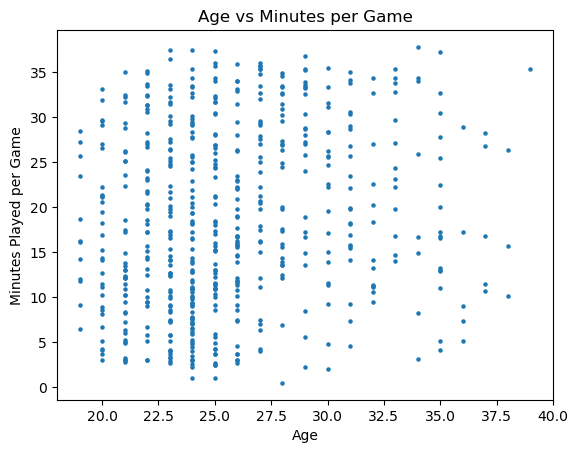

In [17]:
plt.scatter(x=nba["Age"],y=nba["MP"],s=5)
plt.xlabel("Age")
plt.ylabel("Minutes Played per Game")
plt.title("Age vs Minutes per Game")

In [18]:
x= nba["FGA"]
y = nba["PTS"]

x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

model = linear_model.LinearRegression()    
model.fit(x,y)

LinearRegression()

In [19]:
r2 = round(model.score(x,y), 2)            
predicted_y = model.predict(x)

Text(10, 25, 'R2=0.97')

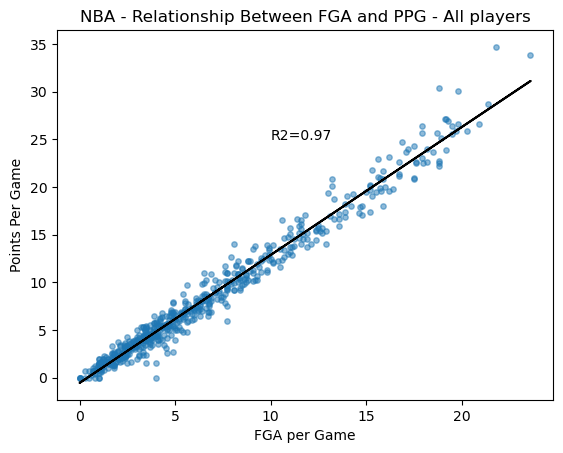

In [20]:
plt.scatter(x, y, s=15, alpha=.5)
plt.plot(x, predicted_y, color = 'black')
plt.title('NBA - Relationship Between FGA and PPG - All players')
plt.xlabel('FGA per Game')
plt.ylabel('Points Per Game')
plt.text(10,25, f'R2={r2}') 

In [21]:
allrounder10 = allround[["Player","Pos","Tm","PTS","AST","TRB","PRA",]]
print(allrounder10)

                     Player Pos   Tm   PTS   AST   TRB   PRA
0               Luka Dončić  PG  DAL  33.9   9.8   9.2  52.9
1               Joel Embiid   C  PHI  34.7   5.6  11.0  51.3
2     Giannis Antetokounmpo  PF  MIL  30.4   6.5  11.5  48.4
3              Nikola Jokić   C  DEN  26.4   9.0  12.4  47.8
4   Shai Gilgeous-Alexander  PG  OKC  30.1   6.2   5.5  41.8
5          Domantas Sabonis   C  SAC  19.4   8.2  13.7  41.3
6              LeBron James  PF  LAL  25.7   8.3   7.3  41.3
7             Anthony Davis   C  LAL  24.7   3.5  12.6  40.8
8              Jayson Tatum  PF  BOS  26.9   4.9   8.1  39.9
9                Trae Young  PG  ATL  25.7  10.8   2.8  39.3
10            Jalen Brunson  PG  NYK  28.7   6.7   3.6  39.0
11                Ja Morant  PG  MEM  25.1   8.1   5.6  38.8
12             Kevin Durant  PF  PHO  27.1   5.0   6.6  38.7
13             Devin Booker  PG  PHO  27.1   6.9   4.5  38.5
14            Julius Randle  PF  NYK  24.0   5.0   9.2  38.2
15         Donovan Mitch